In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm
import warnings
import random
import copy
from sklearn.datasets import make_blobs

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Data generation

## Blob Data

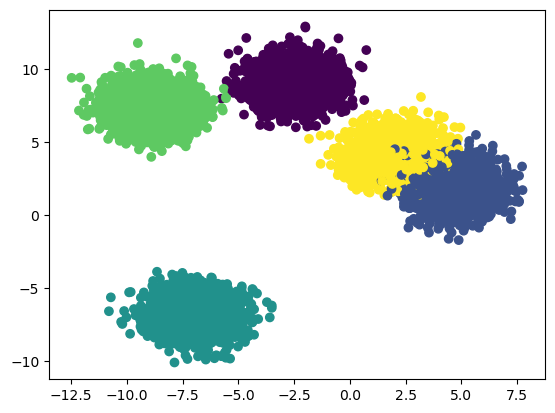

In [204]:
X, y = make_blobs(n_samples=10000, centers=5, n_features=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()
df = pd.DataFrame(X)
df.to_csv("data.csv", index=False, header=False)

## Random generation

In [216]:
n = 100000
dim = 2
rang = 200
fname = "data.csv"      #dataset name

points_very_large_no_header = np.random.rand(n, dim) * rang

# Convert to DataFrame
df = pd.DataFrame(points_very_large_no_header)

# Save to CSV without headers
df.to_csv(fname, index=False, header=False)

# Data testing

## kmeans clustering : use for generating means and covariance.csv

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 96.48534514 166.25728948]
 [ 74.27000483  92.89544975]
 [176.52698244 100.0277868 ]
 [167.31374389  32.88089071]
 [ 33.06605449  32.80383451]
 [165.6778713  167.73414685]
 [ 24.79954079 103.32907148]
 [ 33.04756866 167.32585732]
 [102.57770692  31.5618044 ]
 [126.44033926 102.60976434]]


[[349.0896357   19.42701089]
 [ 19.42701089 373.72182968]
 [211.75378121   2.12521741]
 [  2.12521741 417.39308234]
 [195.49062056   7.84626279]
 [  7.84626279 398.5916533 ]
 [343.0328311  -17.60273022]
 [-17.60273022 362.87330348]
 [361.00158791 -17.10197005]
 [-17.10197005 355.07289971]
 [376.43426049  -2.78845142]
 [ -2.78845142 354.14701121]
 [214.7924511   33.66349419]
 [ 33.66349419 392.14599246]
 [343.18946548 -16.33639455]
 [-16.33639455 344.99791994]
 [366.22063665  20.58491281]
 [ 20.58491281 339.05028403]
 [203.86272216 -15.86249041]
 [-15.86249041 429.11011904]]


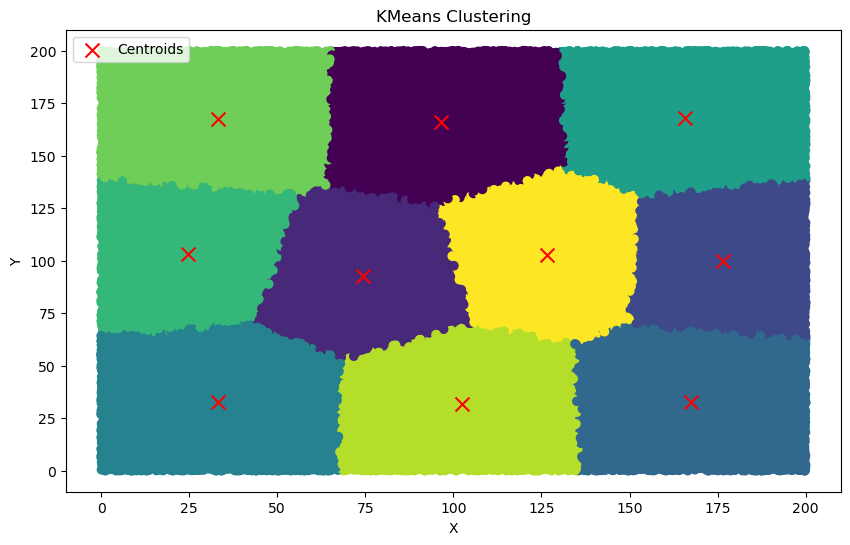

In [218]:
# Step 1: Load the data from CSV without headers
file_path = 'data.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path, header=None)

X = data.values

# Determine number of samples and features
n_samples, n_features = X.shape


# Assuming the CSV has two columns (2D data points)
x_col = 0  # First column index
y_col = 1  # Second column index

# Step 2: Fit the KMeans model
n_clusters=10
kmeans = KMeans(n_clusters)  # Adjust the number of clusters as needed
kmeans.fit(data[[x_col, y_col]])

# Step 3: Add cluster labels to the DataFrame
labels = kmeans.labels_

weights = np.bincount(labels) / n_samples

# Save weights to 'weights.csv'
weights_df = pd.DataFrame(weights)
weights_df.to_csv('weights.csv', index=False, header=False)

means = kmeans.cluster_centers_
print(means)

means_df = pd.DataFrame(means)
means_df.to_csv('means.csv', index=False, header=False)

# Calculate covariance matrices for each cluster
covariances = []
for k in range(n_clusters):
    # Extract data points belonging to the k-th cluster
    cluster_data = data[labels == k]
    # Compute covariance matrix
    cov_matrix = np.cov(cluster_data, rowvar=False)
    covariances.append(cov_matrix)

# Stack the covariance matrices vertically (rows under each other)
covariances_stacked = np.vstack(covariances)
print("\n")
print(covariances_stacked)

# Save covariances to 'covariances.csv'
covariances_df = pd.DataFrame(covariances_stacked)
covariances_df.to_csv('covariances.csv', index=False, header=False)

data['Cluster'] = kmeans.labels_
# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data[x_col], data[y_col], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


## library GMM 

Initialization 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
Initialization converged: True
Final Means:
[[103.58616818  32.98480453]
 [ 32.80420449  98.42278872]
 [175.13535778 164.0982812 ]
 [ 96.05236103  95.71354495]
 [167.49197332  31.9622745 ]
 [164.13279176  95.7453121 ]
 [ 35.27226507  33.31304365]
 [ 73.90265702 163.71065549]
 [126.09866473 161.70879237]
 [ 24.1274935  164.17683413]]

Final Covariance Matrices:
[[[661.46366448  28.47941175]
  [ 28.47941175 416.88445109]]

 [[397.8896365   49.68168689]
  [ 49.68168689 635.64479908]]

 [[237.99837761 -27.52228375]
  [-27.52228375 513.04762359]]

 [[606.86731217  42.65824853]
  [ 42.65824853 602.01958641]]

 [[414.23767487  -1.47815148]
  [ -1.47815148 406.43005729]]

 [[472.29841377   0.98327086]
  [  0.98327086 609.9986274 ]]

 [[467.62998402  13.41312136]
  [ 13.41312136 417.42010029]]

 [[355.02504381  19.68081643]
  [ 19.68081643 490.61841184]]

 [[339.41886465 -10.59203868]
  [-10.592

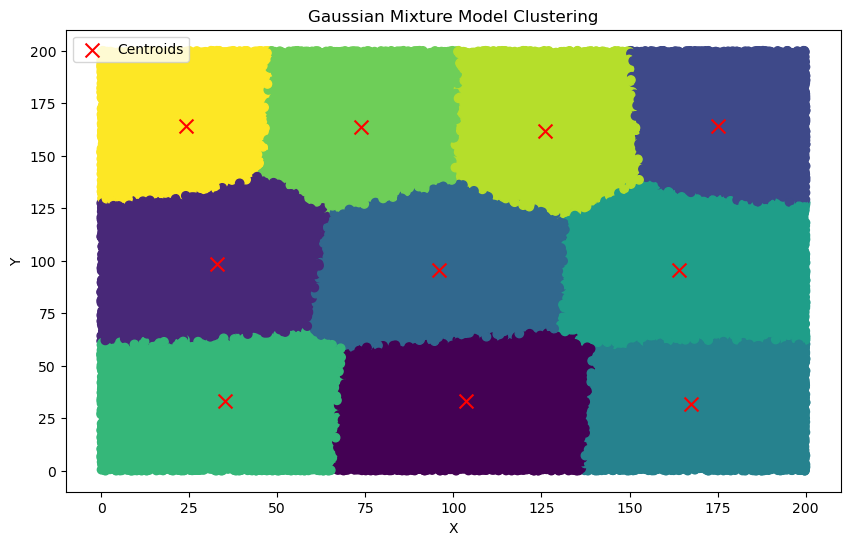

In [219]:
n_cluster=10


# Step 1: Load the data from CSV (assuming headerless CSV)
file_path = 'data.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path, header=None)

# Assuming the CSV has two columns (2D data points)
x_col = 0  # First column index
y_col = 1  # Second column index

# Step 2: Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, init_params='kmeans',covariance_type='full',verbose=1,verbose_interval=1)  # Adjust the number of components as needed
gmm.fit(data[[x_col, y_col]])

# Step 3: Predict cluster labels
data['Cluster'] = gmm.predict(data[[x_col, y_col]])

print("Final Means:")
print(gmm.means_)

print("\nFinal Covariance Matrices:")
print(gmm.covariances_)

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(data[x_col], data[y_col], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model Clustering')
plt.legend()
plt.show()

## Manual GMM | use data from kmeans cluster cell

In [236]:
#manual GMM
N = 100000
D = 2
K = 10

d_weights = copy.deepcopy(weights)
d_means = copy.deepcopy(means)
d_covariances = copy.deepcopy(covariances)
d_inv = [0]*(K)
d_det = [0]*(K)
d_pi = ((2*np.pi)**D)

LL=0 
prev_LL=0

gaussians = np.zeros((N,K))
resp = np.zeros((N,K))
N_k = np.zeros(D)

iter=1
while(True):
    LL = 0
    for j in range(K):
        d_inv[j] = np.linalg.inv(d_covariances[j])
        d_det[j] = abs(np.linalg.det(d_covariances[j]))
    for i in range(N):
        for j in range(K):
            t1 = X[i]-d_means[j,:]
            num_val = np.exp(-(t1@(d_inv[j]@t1))/2)
            den_val = np.sqrt(d_pi*d_det[j])
            #den_val = np.sqrt(abs(np.linalg.det(d_covariances[j])))
            gaussians[i,j] = num_val/den_val
            #gaussians[i,j] = 1/den_val
            
        temp_sum=0
        for j in range(K):
            temp_sum+=d_weights[j]*gaussians[i,j]
        LL+=np.log(temp_sum)
        for j in range(K):
            resp[i,j] = d_weights[j]*gaussians[i,j]/temp_sum

    N_k = np.sum(resp,axis=0)

    for j in range(K):
        temp = np.zeros(D)
        for i in range(N):
            temp=temp+resp[i,j]*X[i]
        d_means[j] = temp/N_k[j]

    for j in range(K):
        temp = np.zeros((D,D))
        for i in range(N):
            temp=temp+(resp[i,j]*np.outer(X[i]-d_means[j],X[i]-d_means[j]))
        d_covariances[j] = temp/N_k[j]

    d_weights = N_k/N
    print(f'LL: {LL} iter:{iter}')
    iter+=1
    if (abs(LL-prev_LL)<0.0001):
        break
    prev_LL=LL

LL: -1075534.494782832 iter:1


KeyboardInterrupt: 

In [237]:
#gmm inference
for j in range(K):
    d_inv[j] = np.linalg.inv(d_covariances[j])
    d_det[j] = abs(np.linalg.det(d_covariances[j]))

for i in range(N):
    for j in range(K):
        t1 = X[i]-d_means[j,:]
        num_val = np.exp(-(t1@(d_inv[j]@t1))/2)
        den_val = np.sqrt(d_pi*d_det[j])
        #den_val = np.sqrt(abs(np.linalg.det(d_covariances[j])))
        gaussians[i,j] = num_val/den_val
        #gaussians[i,j] = 1/den_val
    temp_sum=0
    for j in range(K):
        temp_sum+=d_weights[j]*gaussians[i,j]
    for j in range(K):
        resp[i,j] = d_weights[j]*gaussians[i,j]/temp_sum

d_labels = np.argmax(resp,axis=1)

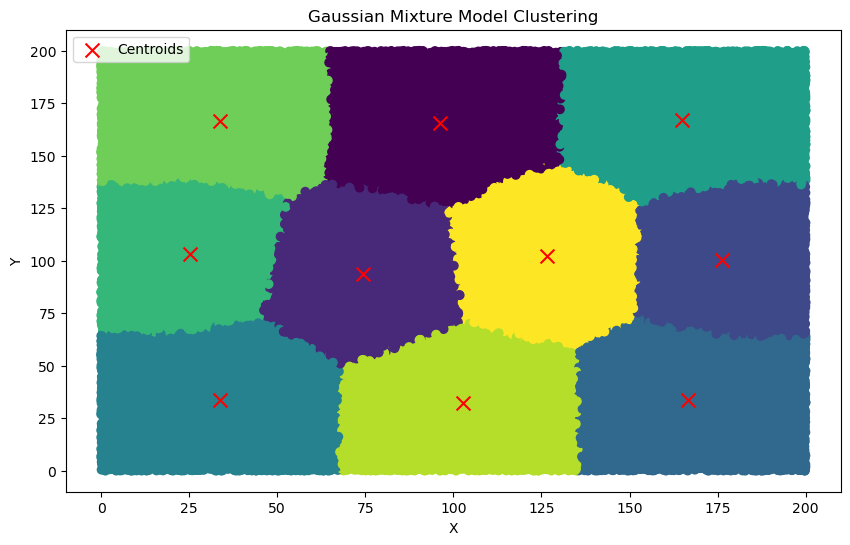

In [238]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=d_labels, cmap='viridis', marker='o')
plt.scatter(d_means[:,0], d_means[:,1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Model Clustering')
plt.legend()
plt.show()